In [1]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
n = 1
num_samples = 600
MU_0 = 0
MU_1 = 1
SIGMA = 1

In [3]:
def generate_time_series(MU_0, MU_1, SIGMA, N, NUM_SAMPLES):
    NUM_SAMPLES = int(NUM_SAMPLES / 2)
    TS = np.concatenate(( np.random.normal(MU_0,SIGMA,(1, NUM_SAMPLES * N)), 
                     np.random.normal(MU_1,SIGMA,(1, NUM_SAMPLES * N))),axis=1 )
    return TS[0]

In [4]:
TS = generate_time_series(0, 1, 1, n, num_samples)

<IPython.core.display.Javascript object>


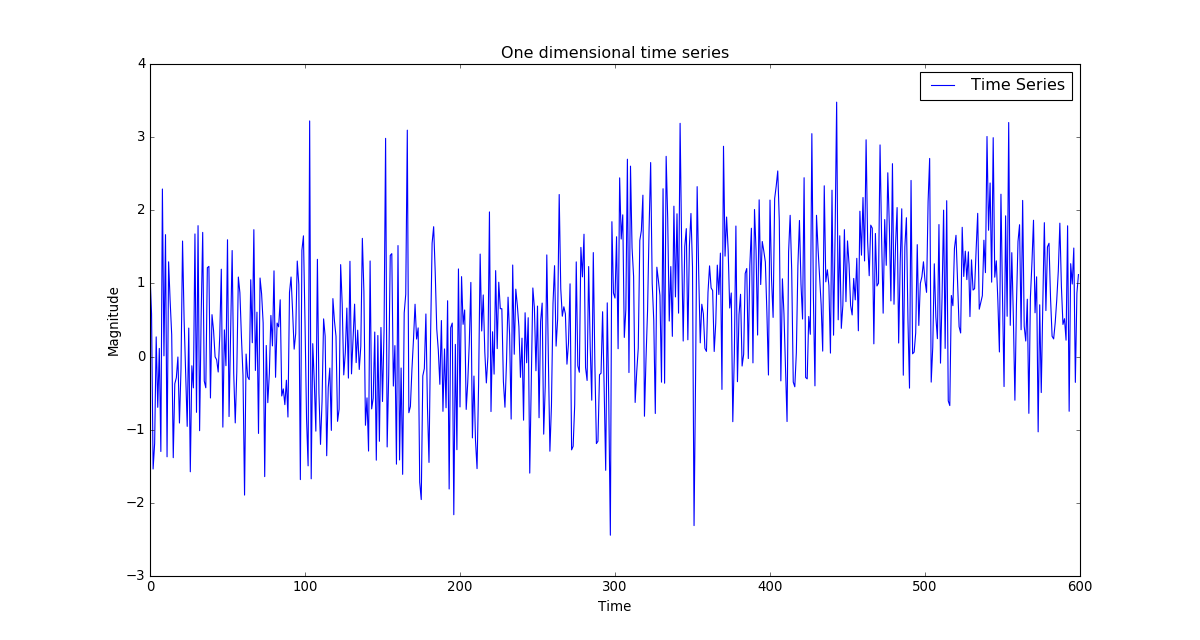

In [26]:
plt.close()
plt.figure(figsize=(15,8))
plt.plot(TS, label='Time Series')
plt.title('One dimensional time series')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.legend()
plt.savefig('../images/1d_offline_ts.png')

In [11]:
l0 = (1/((2*math.pi)**num_samples)) * math.e**(np.sum(np.power((TS - MU_0), 2)))

OverflowError: (34, 'Numerical result out of range')

In [12]:
x_bar = (1/(num_samples * 2)) * np.sum(TS)

x_bar_k = []
x_bar_n_minus_k = []

for k in range(0, TS.shape[0]-1):
    x_bar_k.append(np.sum(TS[:k+1])/(k+1))
    x_bar_n_minus_k.append(np.sum(TS[k+1:])/(num_samples - (k+1)))
    
x_bar_k = np.array(x_bar_k)
x_bar_n_minus_k = np.array(x_bar_n_minus_k)

In [ ]:
#print(TS)
#print(x_bar_k)
#print(x_bar_n_minus_k)

### Calculate sk.  (confusing)

In [13]:
sk = []
for k in range(0, x_bar_k.shape[0]):
    left = np.sum(np.power((TS[:k+1] - x_bar_k[k]), 2))
    right = np.sum(np.power((TS[k+1:] - x_bar_k[k]), 2))
    sk.append(left + right)
    
sk = np.array(sk)

<IPython.core.display.Javascript object>


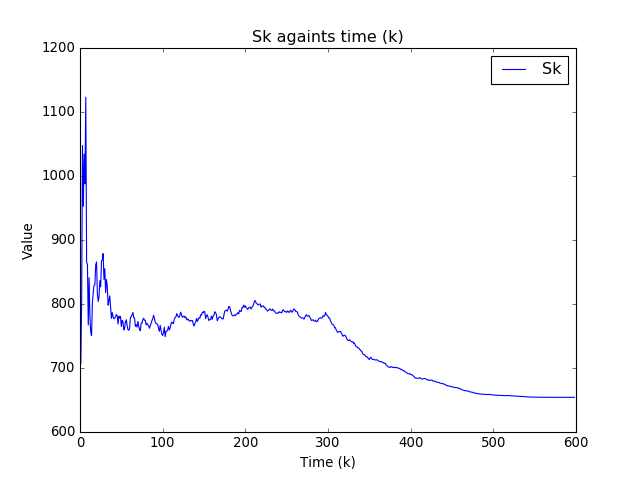

In [19]:
plt.close()
plt.plot(sk, label='Sk')
plt.title('Sk againts time (k)')
plt.xlabel('Time (k)')
plt.ylabel('Value')
plt.legend()
plt.savefig('../images/1d_offline_sk.png')

In [16]:
vk = []

for k in range(0, x_bar_k.shape[0]):
    left  = k*(x_bar_k[k] - x_bar)**2
    right = (num_samples - k) * ((x_bar_n_minus_k[k] - x_bar)**2)
    vk.append(left + right)
    
vk = np.array(vk)

In [17]:
np.argmax(vk)

297

<IPython.core.display.Javascript object>


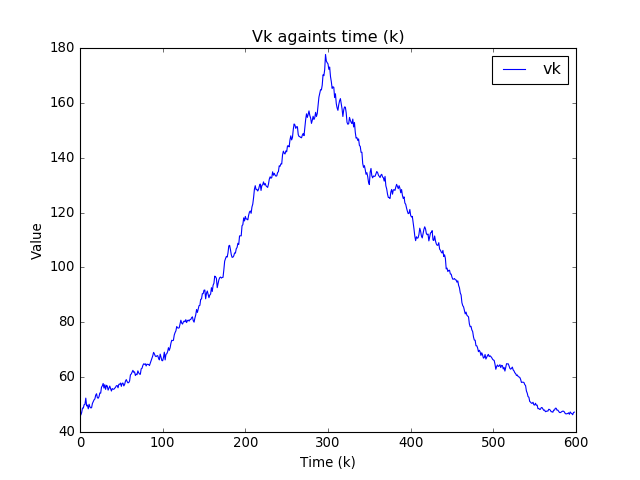

In [20]:
plt.close()
plt.plot(vk, label='vk')
plt.title('Vk againts time (k)')
plt.xlabel('Time (k)')
plt.ylabel('Value')
plt.legend()
plt.savefig('../images/1d_offline_vk.png')

In [21]:
plt.close()